In [2]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Importing data**

In [35]:
data = pd.read_csv('marketing_campaign.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.shape
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

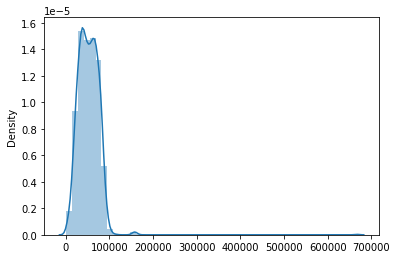

In [6]:
data['Income'].value_counts()
# data.plot(x='Income',kind='bar')
sns.distplot(x=data['Income'])

Considering the distribution of income data, we can see that it is left skewed. Hence, we could use median to fill null values or drop the values

In [36]:
data['Income'].median()
data.fillna(data['Income'].median(),inplace=True)

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [31]:
def no_or_all_unique(data,col):
  if(len(data[col].unique())==1 or len(data[col].unique())==data.shape[0]):
    del data[col]
  return data

In [37]:
for x in data.columns:
  data = no_or_all_unique(data,x)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [40]:
def encode_col(data, col, method):
  enc = method
  enc_col = enc.fit_transform(data[[col]])
  data = pd.concat([data,pd.DataFrame(enc_col,columns=enc.categories_)],axis=1)
  del data[col]
  return data

In [39]:
data['Education'].unique()
data = encode_col(data,'Education',OneHotEncoder(sparse=False))
data.head()

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Single,58138.0,0,0,9/4/2012,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Single,46344.0,1,1,3/8/2014,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Together,71613.0,0,0,8/21/2013,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Together,26646.0,1,0,2/10/2014,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,Married,58293.0,1,0,1/19/2014,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


In [41]:
data['Marital_Status'].unique()
data = encode_col(data,'Marital_Status',OneHotEncoder(sparse=False))
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,"(Absurd,)","(Alone,)","(Divorced,)","(Married,)","(Single,)","(Together,)","(Widow,)","(YOLO,)"
0,1957,58138.0,0,0,9/4/2012,58,635,88,546,172,...,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1954,46344.0,1,1,3/8/2014,38,11,1,6,2,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1965,71613.0,0,0,8/21/2013,26,426,49,127,111,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1984,26646.0,1,0,2/10/2014,26,11,4,20,10,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1981,58293.0,1,0,1/19/2014,94,173,43,118,46,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
del data['Dt_Customer']

In [45]:
data.columns

Index([         'Year_Birth',              'Income',             'Kidhome',
                  'Teenhome',             'Recency',            'MntWines',
                 'MntFruits',     'MntMeatProducts',     'MntFishProducts',
          'MntSweetProducts',        'MntGoldProds',   'NumDealsPurchases',
           'NumWebPurchases', 'NumCatalogPurchases',   'NumStorePurchases',
         'NumWebVisitsMonth',        'AcceptedCmp3',        'AcceptedCmp4',
              'AcceptedCmp5',        'AcceptedCmp1',        'AcceptedCmp2',
                  'Complain',            'Response',           ('Absurd',),
                  ('Alone',),         ('Divorced',),          ('Married',),
                 ('Single',),         ('Together',),            ('Widow',),
                   ('YOLO',)],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_std = std.fit_transform(data)

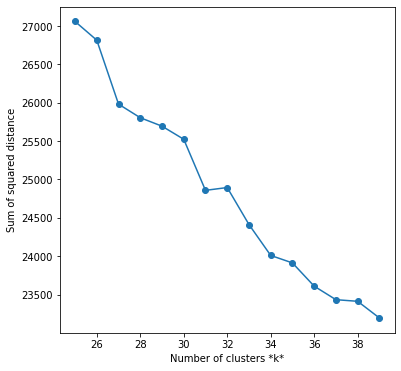

In [53]:
inertias = []
list_k = list(range(25,40))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance')

We can see that elbow chart has little elbow formed for K value 31